# &#127794; Digital Champion - Python Session

## &#128210; Inhaltsverzeichnis:
* [1 Einführung](#first-bullet)
* [2 Entscheidungsbäume Theorie & Aufgabenstellung](#first-bullet)
* [3 Datenaufbereitung](#third-bullet)
* [4 Einfacher Entscheidungsbaum](#fourth-bullet)
* [5 Datenaufbereitung](#fifth-bullet)
* [6 Anhang](#sixth-bullet)
* [7 Lösungen](#seventh-bullet)
* [8 Quellen](#eight-bullet)

## 1 Einführung (5 min) <a class="anchor" id="first-bullet"></a>

Jupyter Notebooks sind interaktive Entwicklungsumgebungen, die es ermöglichen, Code, Visualisierungen und Text in einer einzigen Umgebung zu kombinieren. Sie werden häufig für die Datenanalyse, den Code-Austausch und die Dokumentation verwendet. Mit Jupyter Notebooks können Python-Codezellen ausgeführt und die Ergebnisse sofort angezeigt werden. In diesem Jupyter-Notebook werden wir ```Entscheidungsbäume``` betrachten.

Spezifische Inputs:
* Code-Zellen puaschal einfach mal ausführen

## 2 Entscheidungsbäume Theorie & Aufgabenstellung (10 min) <a class="anchor" id="second-bullet"></a>

### 2.1 Was ist ein Entscheidungsbaum?

Entscheidungsbäume sind eine Methode zur automatischen Klassifizierung von Datenobjekten (z.B. Personen etc.) und damit zur Lösung von Entscheidungsproblemen. Ein Entscheidungsbaum besteht immer aus einem Wurzelknoten (root node) und beliebig vielen inneren Knoten (split node) sowie mindestens zwei Blättern (leaf node). Dabei repräsentiert jeder Knoten eine logische Regel und jedes Blatt eine Antwort auf das Entscheidungsproblem. Im Folgenden ist ein Beispiel für einen Entscheidungsbaum abgebildet:

![alt text for screen readers](./pictures/dt-example-new.png "Beispiel Entscheidungsbaum").

Mit dem abgebildeten Entscheidungsbaum wollen wir mit den Informationen von ```income_usd``` und ```with_mortage``` herausfinden, ob eine Person eine Versicherung hat.

Die folgenden Informationen sind üblicherweise im Entscheidungsbaum abgebildet:
* **gini:** Der Gini-Index beschreibt, wie gut ein Knoten verschiedene Klassen (z.B. ```No Insurance```, ```Has Insurance```) separiert. Der Wert ist immer zwischen 0 und 1. Je kleiner der Gini-Index ist desto besser. Bei der Konstruktion des Entscheidungsbaumes kann der Gini-Index berechnet werden. Es wird immer die logische Regel gewählt, welche den besten Gini-Index aufweist.
* **samples:** Dieser Wert beschreibt die Anzahl Beobachtungen (z.B. Daten von Personen), welche für den Split eines spezifischen Knoten zur Verfügung stehen. Wir sehen beispielsweise, dass für die Konstruktion dieses Baumes Daten von 24 Personen verwendet wurden. Weiter sehen wir, dass der erste Knoten die 24 Personen in eine Gruppe mit 13 und eine Gruppe mit 11 Personen aufteilt.
* **value:** Value beschreibt, wie die Aufteilung der ```samples``` im Knoten aussieht. Der Wert ```[15, 9]``` im ersten Knoten beschreibt beispielsweise, dass von 24 Personen 15 keine Versicherung und 9 Personen eine Versicherung haben.
* **class:** Dieser Wert steht für die Klasse, für welche ein spezifischer Knoten steht. Beispiel: Im ersten Knoten sehen wir, die Klasse ```No insurance```, da von den 24 Personen mehr ```No Insurance``` (15) haben, als ```Has Insurance``` (9). Anhand der Farbe kann ebenfalls die Klasse abgelesen werden. Je röter ein Knoten ist, je mehr gehört er zur Klasse ```No Insurance``` und je blauer ein Knoten ist, je mehr gehört er zur Klasse ```Has Insurance```.

<div class="alert alert-block alert-info"> <b>INFO:</b> 
Wie kann man einen Entscheidungsbaum lesen bzw. wie klassifizert der Entscheidungsbaum neue Beobachtungen (z.B. Personen):

- Wir starten immer beim Wurzelknoten, d.h. ganz oben im Entscheidungsbaum

- Wenn die logische Regel im Knoten für die neue Beobachtung erfüllt ist, geht man nach links und wenn sie nicht erfüllt ist, geht man nach rechts

- Wir durchlaufen den Baum so lange, bis wir bei einem Blatt ankommen. Das ```class``` Attribute im Blatt beschreibt die Klasse des neuen Datenobjekts 

</div>

<div class="alert alert-block alert-success"> <b>AUFGABE 1:</b> Bestimme die Klasse der beiden nachfolgeden Datenobjekte anhand des oben abgebildeten Entscheidungsbaums:

- Datenobjekt 1: income_usd = 100'000; with_mortage = 0

- Datenobjekt 2: income_usd = 73'000; with_mortage = 1

-> Lösungen zu [Aufgabe 1](#lösung_aufgabe_1)

</div>

In [2]:
# Eigene Lösung


### 2.2 Aufgabenstellung

In diesem Jupyter-Notebook arbeiten wir mit dem ['heart-disease'](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) (HD) Datenset. Das Datenset ist eine Tabelle mit 14 Spalten (Features) und 303 Zeilen (Beobachtungen). Eine kurze Beschreibung der verschiedenen Features:
* age: Alter
* sex: Mann/Frau
* restbp: resting blood pressure (Ruheblutdruck (in mm Hg bei Aufnahme ins Krankenhaus))
* chol: Serumcholesterin in mg/dl
* fbs: wenn der Nüchternblutzucker > 120 mg/dl liegt
* thalach: maximale Herzfrequenz erreicht
* exang: Belastungsangina (Richtig/Falsch)
* oldpeak: ST-Depression durch körperliche Betätigung im Vergleich zur Ruhe
* ca: Anzahl der großen Gefäße (0-3), gefärbt durch Fluoroskopie
* hd: Art der Herzerkrankung

Unser Ziel ist es, mit den 303 Beobachtungen ein Modell zu generieren, welches neue Beobachtungen (bzw. Personen) klassifizieren und somit bestimmen kann, ob eine Herzerkrankung (HD) vorliegt oder nicht. Im Modell nutzen wir die oben beschriebenen Features um die Zielvariable (HD) vorherzusagen:

Wir verwenden einen Entscheidungsbaum für die Klassifikation von HD.

## 3 Datenaufbereitung (8 min) <a class="anchor" id="third-bullet"></a>

### 3.1 Read data

Bei jedem neuen Python-Projekt überlegen wir uns, welche Python-Bibliotheken wir verwenden möchten. Eine Python-Bibliothek ist ein wiederverwendbarer Codeblock, den wir in einem Programm bzw. Projekt einbinden können. Das Einbinden von solchen Codeblocks ist einiges schneller als den Code selber zu schreiben.

<div class="alert alert-block alert-info"> <b>INFO:</b> 
Wenn wir in Python programmieren, ist es wichtig zu wissen, dass alles was hinter einem '#' steht kein Code ist, sondern nur ein Kommentar um den Code zu beschreiben. </div>

In [3]:
%%capture
pip install pandas numpy matplotlib scikit-learn

In [4]:
# Bibliotheken importieren
# pandas: Daten lesen und bearbeiten
import pandas as pd
# numpy: berechnen von KPIs
import numpy as np
# plt: ploten von Grafiken
import matplotlib.pyplot as plt
# DecisionTreeClassifier: Modellierungskit für Entscheidungsbäume
from sklearn.tree import DecisionTreeClassifier
# plot_tree: Entscheidungsbaum als Grafik ploten
from sklearn.tree import plot_tree
# train_test_split: Hilfe um Testobjekte in Training- bzw. Testset zu splitten
from sklearn.model_selection import train_test_split
# cross_val_score: Kreuzvalidierung
from sklearn.model_selection import cross_val_score
# confusion_matrix: Konfusionsmatrix ploten
from sklearn.metrics import confusion_matrix
# ConfusionMatrixDispla: Konfusionsmatrix ploten
from sklearn.metrics import ConfusionMatrixDisplay
# accuracy_score: berechne die Accuracy
from sklearn.metrics import accuracy_score

<div class="alert alert-block alert-info"> <b>INFO:</b>  In Python kann man mit Hilft des '=' Operatros Daten in einer Variable speichern. Wenn wir beispielsweise die Zahl 5 in der Variable 'a' speichern möchten, können wir das mit dem folgenden Code machen:
<br><br>
a = 5 
</div>

In [20]:
# pd.read_csv(filepath_or_buffer, sep, encoding) ermöglicht es '.csv' Daten einzulesen
# und in einer Variable als Tabelle zu speichern
df = pd.read_csv(filepath_or_buffer='data/processed_cleveland_small.csv',
                 sep=',',
                 encoding='latin')

In [21]:
# wenn wir eine Variable aufrufen, wird sie geplottet
df

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,hd
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,1
301,57.0,0.0,130.0,236.0,0.0,174.0,0.0,0.0,1.0,1


<div class="alert alert-block alert-success"> <b>AUFGABE 2:</b> 
Speichere die Daten in der Variable 'df_start'
    
-> Lösungen zu [Aufgabe 2](#lösung_aufgabe_2)
</div>

In [22]:
# Eigene Lösung:
df_start = df

In [23]:
# .head() zeigt, wie die ersten fünf Spalten in der Tabelle aussehen
df_start.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,hd
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0


### 3.2 Fehlenden Daten

In [24]:
# Wenn wir den Spaltennamen in eckige Klammer schreiben, z.B. ['Spaltenname'], erhalten wir die Werte dieser Spalte
df_start['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object

Der letzte geplotete Wert ist ein '?'. Wir wollen kurz prüfen, ob es noch mehr solche 'speziellen' Werte gibt.

In [25]:
# Die Funktion .unique() zeigt allte einzigartigen Elemente in der Spalte 'ca'
df_start['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

Da '?' der einzige 'spezielle' Werte in der Spalte ist, nehmen wir an, es sind fehlende Daten.

Um zu sehen, wie viel mal dieser Wert vorkommt, filtern wir danach.

In [26]:
# [Tabellenname['Spaltenname'] == 'zu prüfender Text'] so kann eine Tabelle nach einem spezifischen Spaltenwert gefiltert werden
df_start[df_start['ca'] == '?']

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,hd
166,52.0,1.0,138.0,223.0,0.0,169.0,0.0,0.0,?,0
192,43.0,1.0,132.0,247.0,1.0,143.0,1.0,0.1,?,1
287,58.0,1.0,125.0,220.0,0.0,144.0,0.0,0.4,?,0
302,38.0,1.0,138.0,175.0,0.0,173.0,0.0,0.0,?,0


Der Wert '?' kommt nur wenige Male vor. Aus diesem Grund entfernen wir jede Beobachtung mit einem Fragezeichn. Fehlende Daten können zu Fehleren in der Konstruktion von Entscheidungsbäumen führen.

<div class="alert alert-block alert-info"> <b>INFO:</b> Die wichtigsten Vergleichsoperatoren:
    
* ==: zu vergleichendes Element muss den gleichen Inhalt haben
* !=: zu vergleichendes Element darf nicht den gleichen Inhalt haben
* \>=: zu vergleichende Zahl muss gleich grösser sein
* <=: zu vergleichende Zahl muss gleich kleiner sein
     
     </div>

<div class="alert alert-block alert-success"> <b>AUFGABE 3:</b> 
Wir haben gesehen, dass nur 4 Testobjekte in der Spalte 'ca' ein '?' enthalten. Weil es nur so wenige Testobjekte sind, wollen wir diese aus unserer 'df_start' Tabelle rausfiltern und die neue Tabelle unter 'df_no_missing' speichern.

-> Lösungen zu [Aufgabe 3](#lösung_aufgabe_3)
</div>

In [27]:
# Eigene Lösung:
df_no_missing = df_start[df_start['ca'] != '?']

In [28]:
# hier prüfen wir, ob wir alle '?' entfernt haben
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

### 3.3 Ausreisser

Bei dem folgenden Feature vermuten wir Ausreisser (Outliers):
* age

Eine Möglichkeit Daten auf Ausreisser zu prüfen sind Boxplots. Boxplots zeigen wie die Daten verteilt sind.

![alt text for screen readers](./pictures/boxplot-new.png "Beispiel Boxplot").

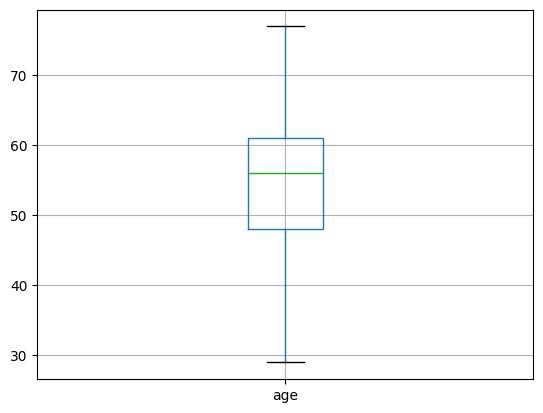

In [20]:
# .boxplot(Spaltenname) plottet einen Boxplot einer Tabellenspalte
df_no_missing.boxplot('age')
plt.show()

Wir sehen, dass es in der Feature ```age``` keine Ausreisser hat. Falls Ausreisser vorkommen, sollte man diese entfernen.

### 3.4 Daten formatieren
In einem nächsten Schritt müssen wir die Daten in zwei Teile auftrennen. Alle Features kommen in den Vektor 'X'. Die Werte der Zielvariablen kommen in den Vektor 'y'.

In [21]:
# mit .copy() kopieren wir das Resultat in eine neue Variable
df_clean = df_no_missing.copy()

In [22]:
# in diesem Schritt speichern wir alle Features in 'X'
# .drop('Spaltenname', axis=1) kann verwendet werden um eine Spalte zu entfernen
# mit .copy() kopieren wir das Resultat in eine neue Variable
X = df_clean.drop('hd', axis=1).copy()
X.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0


In [23]:
# in diesem Schritt speichern wir alle Zielvariablen in 'y'
y = df_clean['hd'].copy()
y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

Im nächsten Schritt unterteilen wir unsere Daten in ein 'Trainings-' und in ein 'Testset':
- Trainingsset: Wird verwendet, um einen Baum auf spezifische Testobjekte zu modellieren, trainieren und ihm die spezifischen Eigenschaften eines Datensatzes mit Testobjekten beizubringen
- Testset: Wird verwendet, um den Baum zu testen und zu kontrollieren, wie gut er mit neuen Datenobjekten abschneidet

In [24]:
# mit der Funktion train_test_split() kann man die Daten in ein Testset bzw. Trainset teilen
# Standardmäßig sind im Testset 25% der Daten vorhanden und im Trainingsset 75%
# wir sehen, dass train_test_split() 4 Tabellen generiert
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 4 Einfacher Entscheidungsbaum <a class="anchor" id="fourth-bullet"></a>
### 4.1 Einfacher Entscheidungsbaum

In diesem Abschnitt konstruieren wir den Entscheidungsbaum aufgrund unserer Testobjekte.

Ein generellese Vorgehen für die Kontruktion ist untenstehend beschrieben:
1. Erstellen Sie einen einfachen Entscheidungsbaum als Basismodell
2. Versuche den einfachen Entscheidungsbaum durch Optimierung der verschiedenen Parameter zu verbessern

In [25]:
# DecisionTressClassifier() übernimmt für uns das erstellen eines Entscheidungsbaumes
clf_dt_e = DecisionTreeClassifier(random_state=42)
# .fit() weist dem Entscheidungsbaum ein Trainingsset zu
clf_dt_e = clf_dt_e.fit(X_train, y_train)

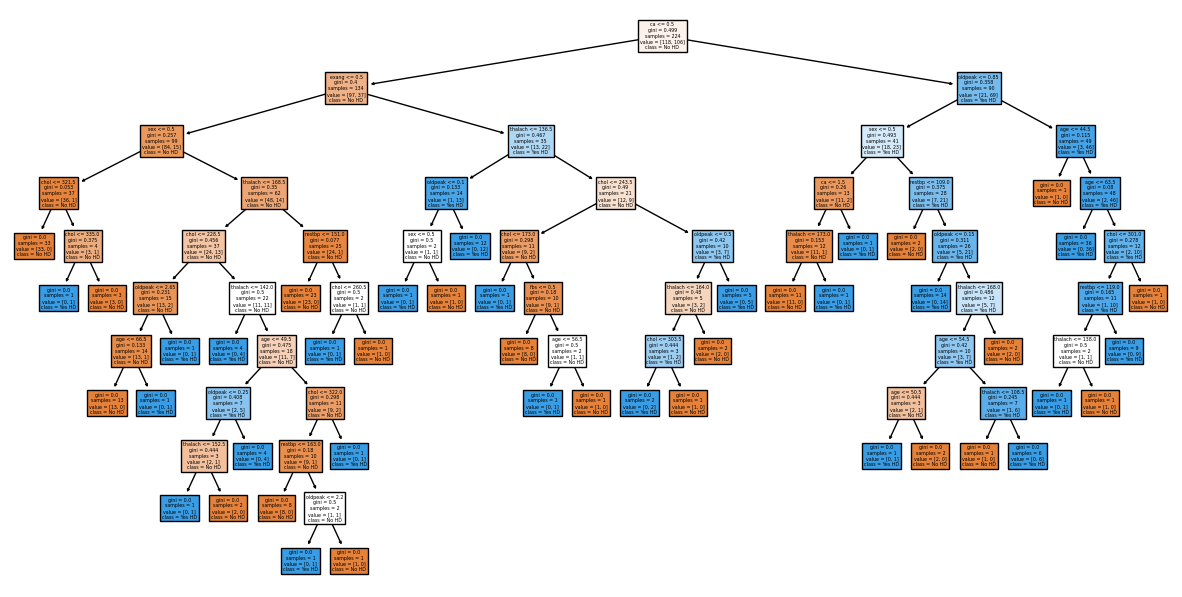

In [26]:
# mit den folgenden Zeilen können wir einen Entscheidungsbaum erstellen
# hier wird die grösse des plots definiert (15 steht für die Breite und 7.5 steht für die Höhe)
plt.figure(figsize=(15, 7.5))

# plot_tree() übernimmt das visualisieren eines Entscheidungsbaumes für uns
# 'decision_tree' steht für den Entscheidungsbaum der visualisiert werden soll
plot_tree(decision_tree=clf_dt_e,
          # 'filled=True' so werden die Knoten mit Farben gefüllt
          filled=True,
          # 'class_names=["No HD", "Yes HD"]' wo wir definiert was in jedem Knoten unter 'class' stehen soll
          class_names=["No HD", "Yes HD"],
          # 'feature_names=X_encoded.columns' muss mitgegeben werden, dass die Features im Plot korrekt bezeichnet werden
          feature_names=X.columns)

# plt.show() zeigt den Plot auf dem Bildschirm an
plt.show()

In einem ersten Schritt haben wir einen 'einfachen' Entscheidungsbaum gebaut. Jetzt wollen wir sehen, wie gut dieser Entscheidungsbaum, welchen wir mit den Trainingsset trainiert haben, Klassifizierungen im Testset vornehmen kann.

In [27]:
# .predict(Tabellenname) kann für Klassifizierungen gebraucht werden
# als Input muss dieser Funktion ein Tabellenname mitgegeben werden -> die Tabelle muss die Test-Features enthalten
predictions = clf_dt_e.predict(X_test)
# der Output ist eine Liste mit den Klassifizierungen (0: No HD; 1: Yes HD)
predictions

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In einem nächsten Schritt wollen wir prüfen, ob diese Klassifizierungen richtig oder falsch sind.

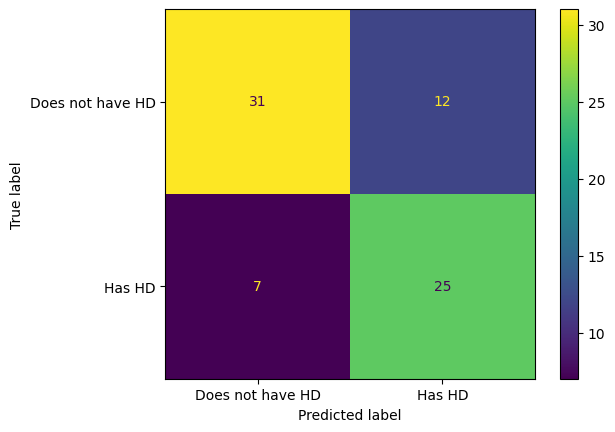

In [28]:
# confusion_matrix() bietet uns eine Möglichkeit für so eine Prüfung
# 'y_true' -> Liste der korrekten Klassifizierungen
cm = confusion_matrix(y_true=y_test,
                      # 'y_pred' -> Liste der vogenommenen Klassifizierungen
                      y_pred=predictions,
                      # 'labels' -> Klassen von clf_dt mitgeben
                      labels=clf_dt_e.classes_)

# ConfusionMatrixDisplay() ist eine Möglichkeit die Confusion-Matrix 'cm' zu visualisieren
# 'confusion_matrix' -> Confusion-Matrix die visualisiert werden soll
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              # 'display_labels' -> welche Labels sollen auf der Visualisierung dargestellt werden
                              display_labels=['Does not have HD', 'Has HD'])
# .plot() plotet die Visualisierung
disp.plot()
# plt.show() zeigt den Plot auf dem Bildschirm an
plt.show()

Die oben abgebildete Grafik zeigt eine Confusion-Matrix. Wie lesen wir diese:
- 31: Haben keine Herzkrankheit -> Diese 31 haben wir korrekt klassifiziert <br>
- 12: Haben keine Herzkrankheit -> Diese 12 haben wir falsch klassifiziert <br>
- 25: Haben eine Herzkrankheit -> Diese 25 haben wir korrekt klassifiziert <br>
- 7: Haben eine Herzkrankheit -> Diese 7 haben wir falsch klassifiziert

Wie gut ein Entscheidungsbaum ist, definieren wir anhand der 'Accuracy'. Welche mit Hilfe der Confusion-Matrix berechnet werden kann.

<div class="alert alert-block alert-info"> <b>INFO:</b>

Accuracy = (TP + TN) / (TP + TN + FP + FN)
<br>
<br>... bei unserem einfachen Entscheidungsbaum haben wir z.B. folgende Precision:
<br> 
<br>Accuracy = (25 + 31) / (25 + 31 + 7 + 12) = 0.75
    
</div>

In [29]:
# accuracy_score(y_true, y_pred) liefert ebenfalls die korrekte Accuracy
accuracy_score(y_true=y_test,
               y_pred=predictions)

0.7466666666666667

## 5 Optimierter Entscheidungsbaum <a class="anchor" id="fifth-bullet"></a>
### 5.1 Pruning

![alt text for screen readers](./pictures/ccp.png "Pruning").

Wir haben einen 44-blättrigen Entscheidungsbaum konstruiert. Dieser Entscheidungsbaum ist auf unsere Testdaten überangepasst. Das heisst, er funktioniert sehr gut für die Klassifizierung von unseren Testdaten aber weniger gut für die Klassifizierung von neuen Daten.

Dieses Problem können wir lösen, indem wir verschiedene Arten von Parametern verwenden (z. B. 'max_ Depth' oder 'min_samples') und den Entscheidungsbaum vereinfachen (weniger Blätter). Diesen Prozess nennt man 'Pruning'.

'Cost Complexity Pruning' ist eine spezifische Methode, um einen kleineren Baum zu finden, der bessere Ergebnisse mit den Testdaten liefert. Wir schauen, ob kleinere Teil-Entscheidungsbäume (Baum mit 38 Blätter, Baum mit 37 Blätter, etc.) bessere Ergebnisse liefern als grössere. Damit kleinere Bäume mit grösseren Bäumen verglichen werden können, verwenden wir 'alpha' als eine Art Penalty, der das Ergebniss von kleineren Bäumen verbessert (Überanpassung kontra. Genauigkeit im Testdatenset).

Eine genauere Anleitung zum 'Cross Complexity Pruning' findet ihr [hier](#anhang_1).

<div class="alert alert-block alert-info"> <b>INFO:</b>

Die Werte von 'alpha' sind wie folgt zu interpretieren:
- 0: Der Entscheidungsbaum ist nicht geprunt (maximale Grösse)
- je grösser 'alpha' desto einfacher (weniger Blätter) ist der Entscheidungsbaum
    
</div>

In [30]:
# .cost_complexity_pruning_path(tabelle_features_train, tabelle_ergebnisse_train) ist ein Algorithmus
# der als Ergebniss wichtige 'alpha' Parameter liefert, welche es zu Überprüfen gilt
path = clf_dt_e.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00401786, 0.00401786, 0.00405844, 0.00414541,
       0.00428571, 0.00434363, 0.00449811, 0.00535714, 0.00595238,
       0.00595238, 0.00639881, 0.00657468, 0.00657468, 0.00680272,
       0.00729167, 0.00755495, 0.0077381 , 0.00803268, 0.00803571,
       0.01001603, 0.0107072 , 0.01081731, 0.01255798, 0.01875   ,
       0.0281719 , 0.02844743, 0.05254358, 0.11567593])

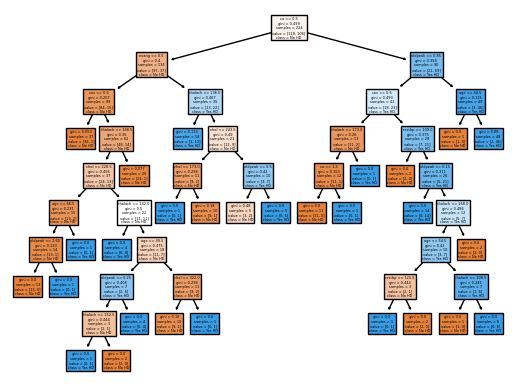

In [31]:
# wir konstruieren jetzt einen Tree mit 'alpha' = 0.00541298
value_alpha = 0.00541298

# definiere den Entscheidungsbaum
clf_dt_new = DecisionTreeClassifier(random_state=0,
                                ccp_alpha=value_alpha)
clf_dt_new.fit(X_train, y_train)

# plote den Entscheidungsbaum
plot_tree(decision_tree=clf_dt_new,
          filled=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X.columns)

# plt.show() zeigt den Plot auf dem Bildschirm an
plt.show()

<div class="alert alert-block alert-success"> <b>AUFGABE 6:</b> 

Kontruiere und plote drei verschiedene Entscheidungsbäume mit verschiedenen 'alpha' Values. Für die Konstruktion kannst du den obigen Code verwenden bzw. kopieren.
    
Bitte stelle sicher, dass du die Entscheidungsbäume in den folgenden Variablen abspeicherst:
- clf_dt_1
- clf_dt_2
- clf_dt_3

-> Lösungen zu [Aufgabe 6](#lösung_aufgabe_6)
    
</div>

In [46]:
# dein Code


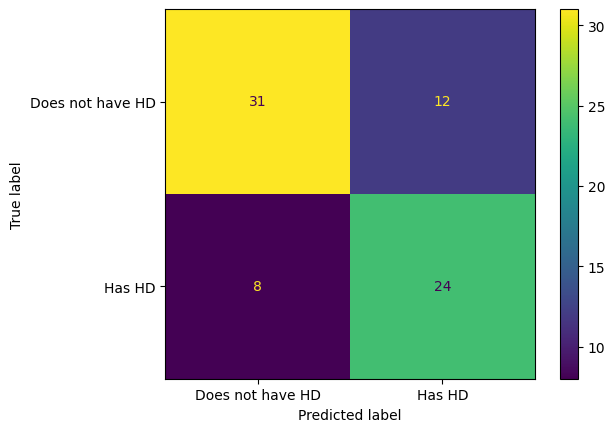

In [32]:
# für den konstruierten Entscheidungsbaum 'clf_dt' wollen wir die Confusion-Matrix plotten, um zu sehen, wie gut er performt
# Klasifizierungen
predictions = clf_dt_new.predict(X_test)
cm = confusion_matrix(y_true=y_test,
                      y_pred=predictions,
                      labels=clf_dt_new.classes_)

# ploten der Confusion-Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Does not have HD', 'Has HD'])

# .plot() plotet die Visualisierung
disp.plot()
plt.show()

<div class="alert alert-block alert-success"> <b>AUFGABE 7:</b> 

Plote die Confusion-Matrix für die in Aufgabe 6 kosnstruierten Entscheidungsbäume. Für die Plots kannst du den obigen Code verwenden bzw. kopieren.
<br>
<br>-> Lösungen zu [Aufgabe 7](#lösung_aufgabe_7)
    
</div>

In [48]:
# dein Code


Wir haben jetzt gesehen, dass je nach 'alpha' die Ergebnisse schlechter oder besser werden. Die Frage ist jetzt, wie finden wir auf eine einfache Art dasjenige 'alpha', bei welchem die Ergebnisse am besten sind.

Wir schreiben einen Code der folgendes für uns erledigt:
1. Einen Entscheidungsbaum pro 'alpha' Wert konstruieren
2. Pro Entscheidungsbaum die 'Accuracy' für das Testset und das Trainingsset rechnen
3. Die 'Accuracy' für jeden Entscheidungsbaum in Abhängigkeit von 'alpha' ploten ()

Der Code, welcher dies für uns ausführt findet ihr untenstehend.

<div class="alert alert-block alert-danger"> <b>Komplexe Code-Zelle:</b> 

Die nachfolgenden Code-Zelle muss nur ausgeführt werden. Das Nachvollziehen der Funktionsweise ist nicht Teil dieser Einführung, dies würde über den Scope hinaus gehen.
    
</div>

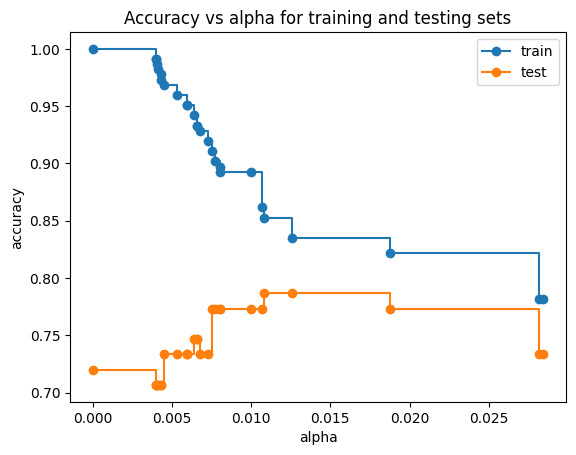

In [43]:
# mit [:-1] entfernen wir den grössten 'alpha' Wert (das grösste 'alpha' hat keine Blätter)
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)
    
# mit dem untenstehenden Code plotten wir 'Accuracy' in Abhängigkeit zu 'alpha' (für Testdaten und Trainingsdaten)
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

Jetzt haben wir eine Liste, welche für jeden 'alpha' Wert den entsprechenden Entscheidungsbaum enthält. Was wir jetzt noch tun müssen, ist die 'Accuracy' in Abhängigkeit für die 'alpha' Werte zu plotten.

Wir tun dies mit dem untenstehenden Code.

Die Erstellung eines solchen Plottes geht über den Scope dieser kurzen Einführung hiaus. Wie der Plot zustande kommt, ist nicht Teil dieser Einführung.

Im obigen Plot finden wir die nötigen Informationen, welche wir brauchen um das beste 'alpha' zu finden.

Von Interesse ist vorallem die orange Linie (Testdaten).

Bei der Auswahl des besten 'alpha' achten wir auf die folgenden zwei Punkte:
1. Die 'Accuracy' von 'test' soll möglichst gross sein
2. Die 'Accuracy' von 'train' soll möglichst gross sein

Unter anbetracht des aufgeführten Punktes, ist das optimale 'alpha' also der sechsletzte Punkt auf der 'test' Linie.

In [35]:
# um den drittletzten Punkt zu finden rufen wir nochmals die Liste mit den 'alpha' Werten auf
ccp_alphas

array([0.        , 0.00401786, 0.00401786, 0.00405844, 0.00414541,
       0.00428571, 0.00434363, 0.00449811, 0.00535714, 0.00595238,
       0.00595238, 0.00639881, 0.00657468, 0.00657468, 0.00680272,
       0.00729167, 0.00755495, 0.0077381 , 0.00803268, 0.00803571,
       0.01001603, 0.0107072 , 0.01081731, 0.01255798, 0.01875   ,
       0.0281719 , 0.02844743, 0.05254358])

In [36]:
# optimales 'alpha'
alpha_opt = 0.01081731

In [37]:
# definiere den Entscheidungsbaum
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=alpha_opt)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

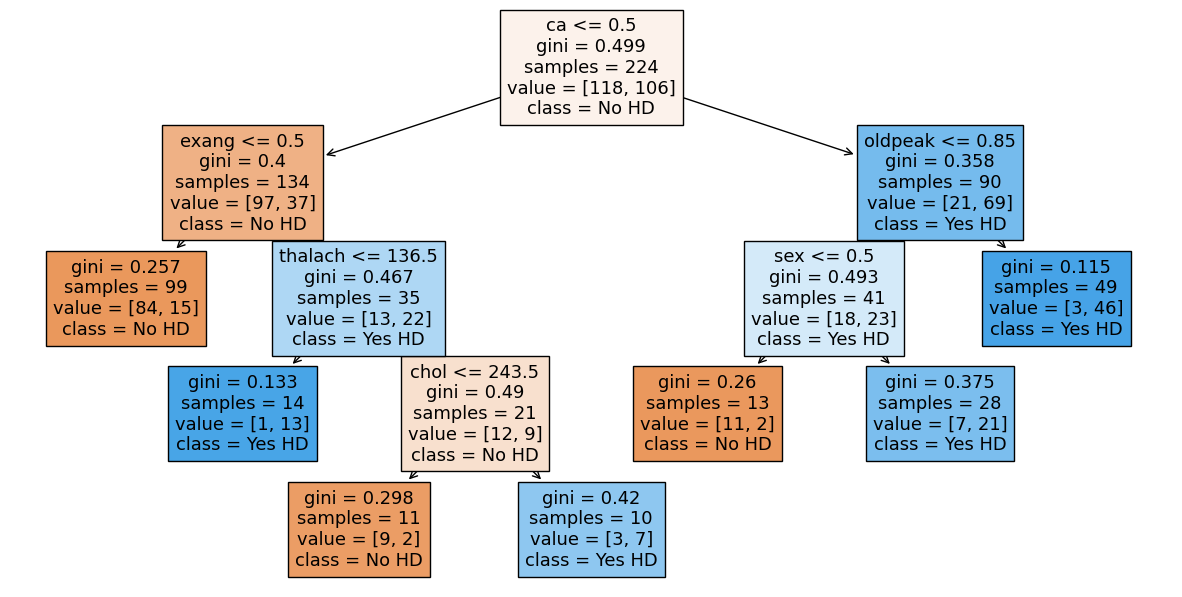

In [38]:
# plotte den Entscheidungsbaum
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X.columns)
plt.show()

In [39]:
# 'Accuracy' des neuen Entscheidungsbaumes
predictions_new = clf_dt_pruned.predict(X_test)
accuracy_score(y_true=y_test,
               y_pred=predictions_new)

0.7866666666666666

## 6 Anhang <a class="anchor" id="sixth-bullet"></a>

<a id='anhang_1'></a>
### Anhang 1: Anleitung Cross Complexity Pruning

Der Algorithmus zur Kostenkomplexitätsbeschneidung folgt in der Regel diesen Schritten:

1. Erstellen Sie einen anfänglichen Entscheidungsbaum mit einem Trainingsdatensatz unter Berücksichtigung aller verfügbaren Attribute und Merkmale.
2. Bewerten Sie die Klassifikationsleistung des Entscheidungsbaums anhand eines separaten Validierungsdatensatzes.
3. Berechnen Sie für jeden internen Knoten des Entscheidungsbaums seine potenziellen Kosten in Bezug auf die fehlerhafte Klassifizierung oder andere Metriken.
4. Weisen Sie jedem internen Knoten eine Kostenkomplexitätswertung zu, die in der Regel als Summe seiner Kosten für fehlerhafte Klassifizierung und eines Strafterms berechnet wird, der proportional zur Anzahl der absteigenden Blattknoten ist.
5. Beginnend beim Wurzelknoten beschneiden Sie iterativ den Knoten mit der niedrigsten Kostenkomplexitätswertung und erstellen eine Reihe von kleineren Entscheidungsbäumen.
6. Bewerten Sie die Klassifikationsleistung jedes beschnittenen Entscheidungsbaums anhand des Validierungsdatensatzes.
7. Wählen Sie den beschnittenen Baum mit der besten Leistung aus, die oft anhand der Genauigkeit oder einer anderen geeigneten Metrik gemessen wird.
8. Optional können Sie den ausgewählten Baum weiter beschneiden, indem Sie den Komplexitätsparameter α optimieren und die Schritte 5-7 wiederholen.
9. Der endgültige beschnittene Entscheidungsbaum wird erzielt, wenn durch zusätzliches Beschneiden keine weiteren Verbesserungen der Leistung erzielt werden können.

## 7 Lösungen <a class="anchor" id="seventh-bullet"></a>

<a id='lösung_aufgabe_1'></a>
### Lösung Aufgabe 1

Klassen:
- Datenobjekt 1 = 'Has Insurance'
- Datenobjekt 2 = 'Has Insurance' 

<a id='lösung_aufgabe_2'></a>
### Lösung Aufgabe 2

In [ ]:
df_start = df

<a id='lösung_aufgabe_3'></a>
### Lösung Aufgabe 3

In [ ]:
df_no_missing = df_start[df_start['ca'] != '?']

<a id='lösung_aufgabe_4'></a>
### Lösung  Aufgabe 4

In [ ]:
# unique Elemente zeigen
df_no_missing['thal'].unique()

In [ ]:
# anzeigen wie viele '?' es hat
len(df_no_missing[df_no_missing['thal'] == '?'])

In [ ]:
# '?' rausfiltern
df_no_missing_2 = df_no_missing[df_no_missing['thal'] != '?']

<a id='lösung_aufgabe_5'></a>
### Lösung  Aufgabe 5

In [28]:
X_encoded = pd.get_dummies(X,
                           columns=['cp',
                                    'restecg',
                                    'slope',
                                    'thal'],
                            dtype=int)
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


<a id='lösung_aufgabe_6'></a>
### Lösung Aufgabe 6

Die folgenden Code-Zellen bilden eine mögliche Lösung zu Aufgabe 6 ab.

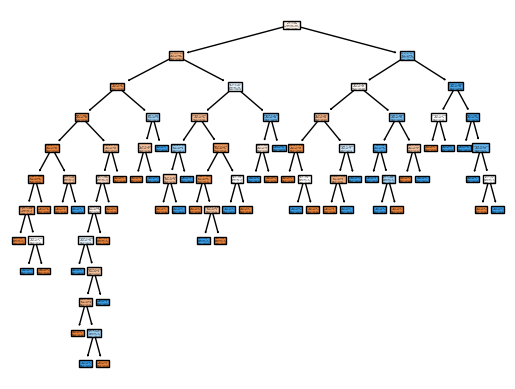

In [46]:
# wir konstruieren jetzt einen Tree mit 'alpha' = 0.00557903
value_alpha = 0.0000000000001

# definiere den Entscheidungsbaum
clf_dt_1 = DecisionTreeClassifier(random_state=0,
                                ccp_alpha=value_alpha)
clf_dt_1.fit(X_train, y_train)

# plote den Entscheidungsbaum
plot_tree(decision_tree=clf_dt_1,
          filled=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)

# plt.show() zeigt den Plot auf dem Bildschirm an
plt.show()

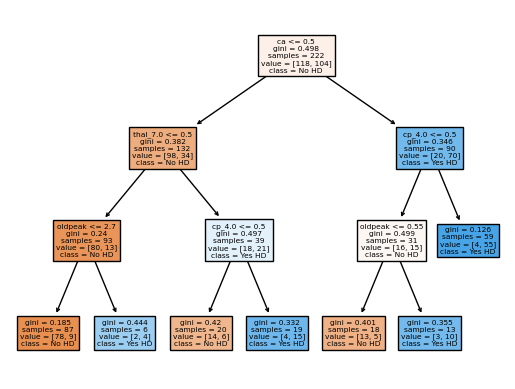

In [47]:
# wir konstruieren jetzt einen Tree mit 'alpha' = 0.00557903
value_alpha = 0.01425422

# definiere den Entscheidungsbaum
clf_dt_2 = DecisionTreeClassifier(random_state=0,
                                ccp_alpha=value_alpha)
clf_dt_2.fit(X_train, y_train)

# plote den Entscheidungsbaum
plot_tree(decision_tree=clf_dt_2,
          filled=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)

# plt.show() zeigt den Plot auf dem Bildschirm an
plt.show()

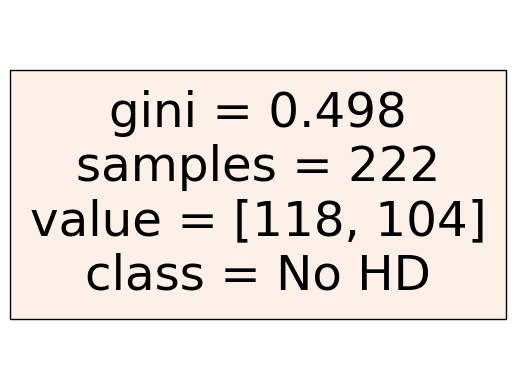

In [48]:
# wir konstruieren jetzt einen Tree mit 'alpha' = 0.00557903
value_alpha = 0.2

# definiere den Entscheidungsbaum
clf_dt_3 = DecisionTreeClassifier(random_state=0,
                                ccp_alpha=value_alpha)
clf_dt_3.fit(X_train, y_train)

# plote den Entscheidungsbaum
plot_tree(decision_tree=clf_dt_3,
          filled=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)

# plt.show() zeigt den Plot auf dem Bildschirm an
plt.show()

<a id='lösung_aufgabe_7'></a>
### Lösung Aufabe 7
Die folgenden Code-Zellen bilden eine mögliche Lösung zu Aufgabe 7 ab.

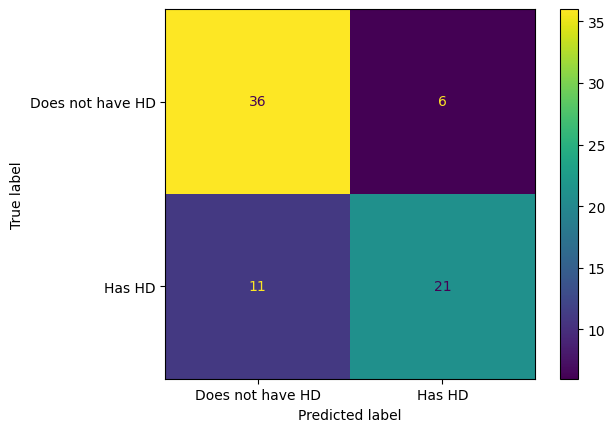

In [112]:
# Klasifizierungen
predictions = clf_dt_1.predict(X_test)
cm = confusion_matrix(y_true=y_test,
                      y_pred=predictions,
                      labels=clf_dt.classes_)

# ploten der Confusion-Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Does not have HD', 'Has HD'])

# .plot() plotet die Visualisierung
disp.plot()
plt.show()

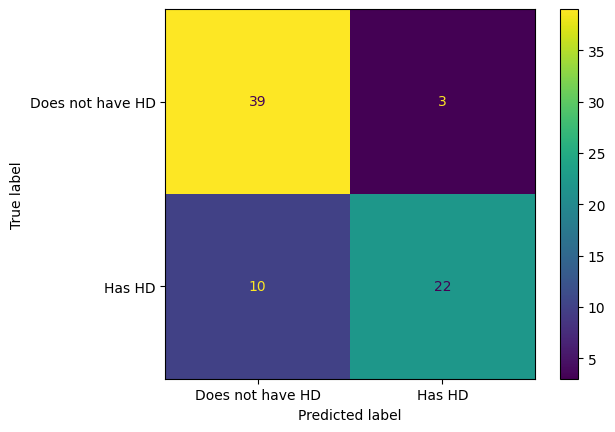

In [113]:
# Klasifizierungen
predictions = clf_dt_2.predict(X_test)
cm = confusion_matrix(y_true=y_test,
                      y_pred=predictions,
                      labels=clf_dt.classes_)

# ploten der Confusion-Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Does not have HD', 'Has HD'])

# .plot() plotet die Visualisierung
disp.plot()
plt.show()

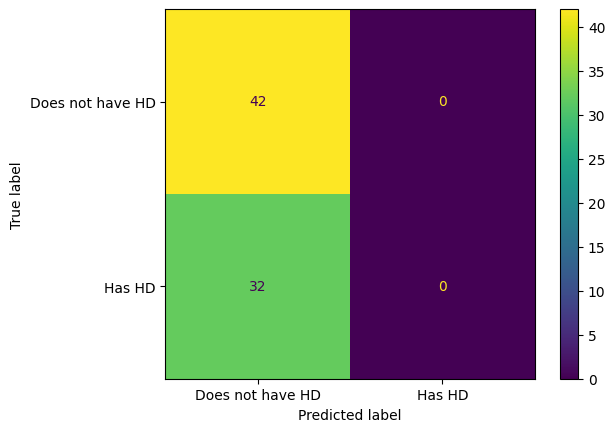

In [114]:
# Klasifizierungen
predictions = clf_dt_3.predict(X_test)
cm = confusion_matrix(y_true=y_test,
                      y_pred=predictions,
                      labels=clf_dt.classes_)

# ploten der Confusion-Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Does not have HD', 'Has HD'])

# .plot() plotet die Visualisierung
disp.plot()
plt.show()

## 8 Quellen <a class="anchor" id="eight-bullet"></a>

### &#169; Quellen:
&#128190; **Daten:** https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
<br>
&#128252;  **Video:** https://youtu.be/q90UDEgYqeI?list=PLBq2sVJiEBvA9rPo3IEQsJNI4IJbn81tB

### &#128161; Weitere Informationen:

``` Decision Trees: ``` &nbsp; https://www.youtube.com/watch?v=7VeUPuFGJHk&t=0s
<br>
``` Cross Validation: ``` &nbsp; https://www.youtube.com/watch?v=fSytzGwwBVw&t=0s
<br>
``` Confusion Matrix: ``` &nbsp; https://www.youtube.com/watch?v=Kdsp6soqA7o&t=0s
<br>
``` Cost-Complexity Pruning: ``` &nbsp; https://www.youtube.com/watch?v=D0efHEJsfHo&t=0s
<br>
``` Bias and Variance and Overfitting: ``` &nbsp; https://www.youtube.com/watch?v=EuBBz3bI-aA&t=0s